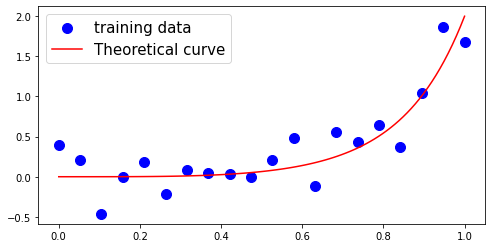

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

np.random.seed(10)
#função para gerar os dados
def function(x):
    y = x**4 + x**9
    return y

# training set
N_train = 20
sigma = 0.3
x_train= np.linspace(0, 1,N_train)
y_train = function(x_train) + np.random.normal(0,sigma, N_train)
x_train = x_train.reshape(len(x_train), 1)

fig = plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b",
            s=100, label="training data")

# test set
N_test = 20
x_test=np.linspace(0, 1,N_test)
y_test = function(x_test) +  np.random.normal(0,sigma, N_test)
x_test = x_test.reshape(len(x_test), 1)

# Curva teorica
xt = np.linspace(0,1,100)
yt = function(xt)
plt.plot(xt,yt, '-r',  label="Theoretical curve")
plt.legend(fontsize=15)
plt.show(True)

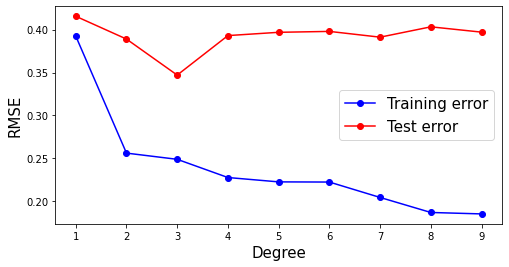

In [11]:
#Funcao para calcular o erro quadrático médio
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

# lista que armazena os erros de acordo com o grau do polinomio
training_errors = []
test_errors = []
degree = [] # armazena os graus do polinomio
for M in np.arange(1,10):   
    # modelo a ser usado: regressão linear
    model = linear_model.LinearRegression()
    # transforma os dados para obter a matriz onde cada coluna i armazena x**i
    poly = PolynomialFeatures(degree=M) 
    X_train = poly.fit_transform(x_train)
    # realiza a regressão linear no conjunto de treinamento
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_train)
    error_train = rmse(Y_pred,y_train)
    training_errors.append(error_train)

    # realiza a regressão linear no conjunto de teste
    X_test=poly.fit_transform(x_test)
    Y_pred2 = model.predict(X_test)
    error_test = rmse(Y_pred2, y_test)
    test_errors.append(error_test)
    degree.append(M)
fig = plt.figure(figsize=(8, 4))
plt.plot(degree, training_errors, 'b-o', label = 'Training error')
plt.plot(degree, test_errors, 'r-o', label= 'Test error')
plt.xlabel("Degree", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.legend(fontsize = 15)
plt.show(True)

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score
import numpy as np
from sklearn import cluster, datasets

np.random.seed(10)

n_samples = 100

c = [(-1, -1), (0, 0), (2, 2),(10,-5)]
n=400 #número de pontos
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=2, random_state=50)
X = data[0]
y = data[1]

In [20]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_km = kmeans.fit_predict(X)

clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='single')
y_hr = clustering.fit_predict(X)

In [22]:
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score
from sklearn.metrics import silhouette_score

print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', mutual_info_score(y_km, data[1]))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - single linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr, data[1]))
print('Mutual information score:', mutual_info_score(y_hr, data[1]))
print('Silhouette score:', silhouette_score(X, y_hr, metric='euclidean'))

K-means:
Adjusted rand score: 0.46620844006134715
Mutual information score: 0.6659225929070871
Silhouette score: 0.46044499539500877


Agrupamento hierárquico - single linkage:
Adjusted rand score: 2.5231495820213482e-05
Mutual information score: 0.006969287627233485
Silhouette score: 0.1299188797259359


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(10)

# leitura dos dados
data = pd.read_csv('../data/BostonHousing.csv', header=(0))
# remove nan (Not a Number)
data = data.dropna()
data = data.drop(data.columns[[0]], axis=1) # remove the first column (if useless)
# define a variável de saída
ylabel = data.columns[-1]
attributes = data.columns

print('Número de observações e atributos:',data.shape)
list_labels = list(data.columns)
data.head(10)

# Converte os dados para numpy para facilitar a manipulação
datanp = data.to_numpy()
nrow,ncol = datanp.shape
y = datanp[:,-1]
X = datanp[:,0:ncol-1]

# Split the data into training and testing sets
p = 0.3 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Número de observações e atributos: (506, 13)


In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
y_pred = lasso.predict(x_test)           # Use this model to predict the test data
RSME = mean_squared_error(y_test, y_pred)         # Calculate the test MSE
print('RSME:', RSME)

RSME: 30.176132464923153


/home/gustavoalmeida/.local/share/virtualenvs/mba-icmc-data_science-introducao_data_scie-Xc884u1h/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [26]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2:", R2)          # Calculate the test MSE

R2: 0.5950224288099999


In [27]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
    y_pred = lasso.predict(x_test)           # Use this model to predict the test data
    r2 = r2_score(y_test, y_pred)
    vR2.append(r2)
    valpha.append(alpha)


/home/gustavoalmeida/.local/share/virtualenvs/mba-icmc-data_science-introducao_data_scie-Xc884u1h/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gustavoalmeida/.local/share/virtualenvs/mba-icmc-data_science-introducao_data_scie-Xc884u1h/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in vers

In [28]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)             # Fit a ridge regression on the training data
print('Coeficientes: TV, radio, newspaper')
lasso.coef_

Coeficientes: TV, radio, newspaper


/home/gustavoalmeida/.local/share/virtualenvs/mba-icmc-data_science-introducao_data_scie-Xc884u1h/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


array([ 0.        , -0.        ,  0.        , -0.        ,  3.18851141,
       -0.        , -0.        , -0.        , -0.        , -0.30668633,
        0.        , -0.48666629])

In [29]:
data

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [31]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

np.random.seed(10)

data = pd.read_csv('../data/water_potability.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns)
data.head(10)

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p)

Número de linhas e colunas na matriz de atributos: (2011, 10)


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.6228287841191067
